In [46]:
import pandas as pd
import seaborn as sns
# https://medium.com/district-data-labs/building-a-classifier-from-census-data-18f996c4d7cf

In [47]:
#age: continuous.
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#fnlwgt: continuous.
#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#education-num: continuous.
#marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#sex: Female, Male.
#capital-gain: continuous.
#capital-loss: continuous.
#hours-per-week: continuous.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [48]:
#from the UCI website, names.data givs us: age = continuous; 
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
# create functin to import data from the URL and save to file within current directory, then import that saved data
adult_df = pd.read_csv('./python_adult_data/adult.data', names=names)



In [49]:
# i want to try the delimiter attribute
delim_adult_df = pd.read_csv("./python_adult_data/adult.data", header=None, delimiter=r"\s+",)

In [50]:
# describe df
adult_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
# now with the delim
delim_adult_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K


In [52]:
delim_adult_df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [53]:
# much better!
delim_adult_df.head(1)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K


In [11]:
adult_df.shape

(32560, 15)

In [ ]:
adult_df['Income']

In [23]:
# what are unique values of workclass
adult_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

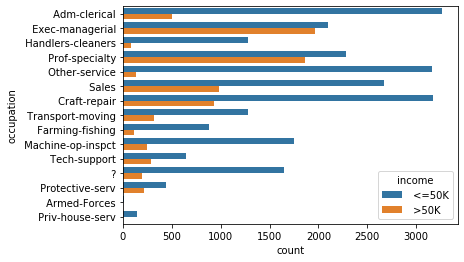

In [24]:
# use seaborn's countplot to count occurences of each data point
sns.countplot(y='occupation', hue='income', data=adult_df,)

In [ ]:
# now let's look at education via income

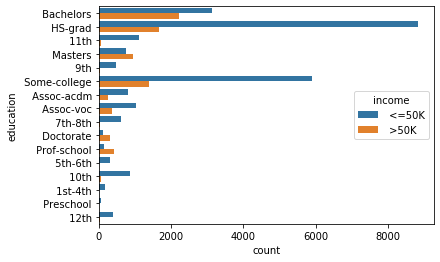

In [25]:
sns.countplot(y='education', hue='income', data=adult_df,)

In [31]:
# any NaNs in the df?
adult_df.isnull().values.any()

False

In [32]:
delim_adult_df.isnull().values.any()

False

In [33]:
# both are false so no NaNs


In [35]:
adult_df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [45]:
adult_df['income'].unique()

array([-1])

In [44]:
adult_df.income.unique()

array([-1])

In [40]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,0.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,NaN
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,NaN
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,NaN
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,NaN
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,NaN
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,NaN
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,NaN


In [41]:
adult_df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [54]:
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [55]:
adult_df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [61]:
adult_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [65]:
adult_df[adult_df['sex'] == ' Female']['age'].mean()

36.85823043357163

In [73]:
germans = adult_df[adult_df['native-country'] == ' Germany']["native-country"].count()

In [74]:
total_population = adult_df['native-country'].count()

In [75]:
percentage = (germans/total_population) *100

In [76]:
percentage

0.42074874850281013

In [80]:
#whose value is less than 50K
print("mean of age for those who earn less than 50K:",adult_df[adult_df['income']==" <=50K"]["age"].mean())

mean of age for those who earn less than 50K: 36.78373786407767


In [81]:
print(' Here is the average age of those making less than 50k: ' adult_df[adult_df['income'] == ' <=50k']['age'].mean())

SyntaxError: invalid syntax (<ipython-input-81-3abbb76f1b75>, line 1)

In [85]:
print("Here is the average age of those making less than 50k: ",  adult_df[adult_df['income'] == " <=50k"]["age"].mean())
#print("mean of age for those who earn less than 50K:"           ,adult_df[adult_df['income']==" <=50K"]["age"].mean())

Here is the average age of those making less than 50k:  nan


In [86]:
print("mean of age for those who earn less than 50K:",adult_df[adult_df['income']==" <=50K"]["age"].mean())

mean of age for those who earn less than 50K: 36.78373786407767


In [88]:
# now standard deviation
print("Here is the stdev", adult_df[adult_df['income'] == ' <=50K']['age'].std())

Here is the stdev 14.020088490824813


In [89]:
# now less than 50k values
adult_df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [101]:
# list education values
adult_df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [102]:
education_arr = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th']

In [109]:
adult_df[adult_df['income'] == ' >=50K']['education'].isin(education_arr).all()

True

In [110]:
random_arr = ['blue','green']

In [111]:
adult_df[adult_df['income'] == ' >=50K']['education'].isin(random_arr).all()

True

In [112]:
adult_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [114]:
adult_df.groupby('age').describe()

fnlwgt                                                               \
     count           mean            std       min        25%       50%   
age                                                                       
17   395.0  185722.232911  105974.139070   19752.0  117051.50  172145.0   
18   550.0  193530.207273  112996.915840   20057.0  118847.00  174563.0   
19   712.0  204803.543539  116424.673450   20469.0  123642.50  194150.0   
20   753.0  198537.705179  107076.238926   22966.0  122215.00  190423.0   
21   720.0  200116.997222  106200.604029   20728.0  129593.00  192189.0   
22   765.0  202336.500654  104779.267815   22966.0  125905.00  195143.0   
23   877.0  206116.502851  113593.262452   13769.0  129767.00  194102.0   
24   798.0  205230.456140  112600.233984   19410.0  128998.75  195278.0   
25   841.0  203066.870392  112809.129147   12285.0  129200.00  190107.0   
26   785.0  192976.476433  102882.508879   18827.0  122206.00  181666.0   
27   835.0  196381.977246  106500.895004   19395.0  126395.00  186454.0   
28   867.0  190923.176471  107425.333006   19395.0  115958.00  183639.0   
29   813.0  192208.065191  107119.206314   19793.0  119848.00  180916.0   
30   861.0  194037.128920  109884.503851   19302.0  116666.00  177304.0   
31   888.0  196720.671171  115815.816540   19302.0  118853.25  181654.5   
32   828.0  194152.028986  109856.904830   19302.0  119101.25  182820.0   
33   875.0  198093.694857  114434.989242   23871.0  123357.50  180656.0   
34   886.0  194647.231377  109264.481033   19847.0  117968.00  182055.5   
35   876.0  192363.384703  111639.209314   20469.0  112440.50  185461.0   
36   898.0  194223.256125  113143.148665   20333.0  116679.00  180686.0   
37   858.0  192437.217949  109874.897487   19899.0  115556.25  181015.0   
38   827.0  189929.437727  107984.882195   20308.0  112125.50  181705.0   
39   816.0  190879.541667  112998.160044   19914.0  115180.25  178982.0   
40   794.0  187816.146096  102581.269986   20109.0  116632.00  178924.5   
41   808.0  182547.485149  102461.291554   19914.0  113539.00  174063.5   
42   780.0  187778.248718  110695.057466   19700.0  117078.25  179152.0   
43   770.0  187239.063636  101199.576355   19914.0  117158.00  178598.5   
44   724.0  189726.196133  103415.650133   19914.0  119098.25  175939.0   
45   734.0  185838.460490  105688.407766   20534.0  116186.00  178330.0   
46   737.0  192636.710991  102275.909422   14878.0  120131.00  177114.0   
..     ...            ...            ...       ...        ...       ...   
60   312.0  165574.791667   88353.671238   21101.0  106241.00  160108.5   
61   300.0  171559.143333   96611.373618   24046.0  113544.00  162414.5   
62   258.0  166735.116279   84391.096390   24050.0  115061.25  161852.5   
63   230.0  174691.752174  103500.811547   20323.0  106648.00  164738.0   
64   208.0  180223.625000   95032.093276   21174.0  113777.75  170928.0   
65   178.0  176149.719101   88968.326222   22907.0  113866.75  172749.5   
66   150.0  177031.840000   83066.814478   22313.0  115593.50  174891.5   
67   151.0  174771.165563   90313.738164   34122.0  106159.00  166187.0   
68   120.0  183613.750000   91483.580794   29240.0  124427.75  176145.5   
69   108.0  184736.333333  119081.468880   28197.0  108196.00  166421.5   
70    89.0  194067.460674  101243.163708   26990.0  133248.00  176285.0   
71    72.0  169466.291667   86719.677898   26109.0  114718.75  162795.0   
72    67.0  184093.805970  114668.763944   28929.0  107352.00  166253.0   
73    64.0  165364.859375   82572.712853   26248.0  100948.00  157077.0   
74    51.0  161606.529412   81467.893369   29866.0   98175.00  167537.0   
75    45.0  162798.888889   82325.990141   30599.0  101887.00  165968.0   
76    46.0  175349.630435   85611.812531   25319.0  118075.75  173925.5   
77    29.0  156695.310345   62307.848280   28678.0  132728.00  149912.0   
78    23.0  164613.217391   99752.535072   27979.0   87522.50  136198.0   
79    22.0  150151.863636   7

In [115]:
adult_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [121]:
adult_ages = adult_df['age'].unique()

In [122]:
print(len(adult_ages))

73
